# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


### Exercise 1  Exploration 

In [3]:
# The total number of records
n_records = data.shape[0]
print(n_records)

45222


In [4]:
# The number of individuals making more than $50000 annually
n_greater_50K = data['income'].value_counts().loc['>50K']
print(n_greater_50K)

11208


In [5]:
# The number of individuals making at most $50000 annually
n_at_most_50K = data['income'].value_counts().loc['<=50K']
print(data['income'].value_counts().loc['<=50K'])

34014


In [6]:
# The percentage of individuals making at more than $50000 annually
greater_percent = data['income'].value_counts(normalize=True).loc['>50K']
print(data['income'].value_counts(normalize=True).loc['>50K'])

0.2478439697492371


### Exercise 2 Preprocessing 

C:\Users\17460\AppData\Local\Temp\ipykernel_91724\2129048353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain'])


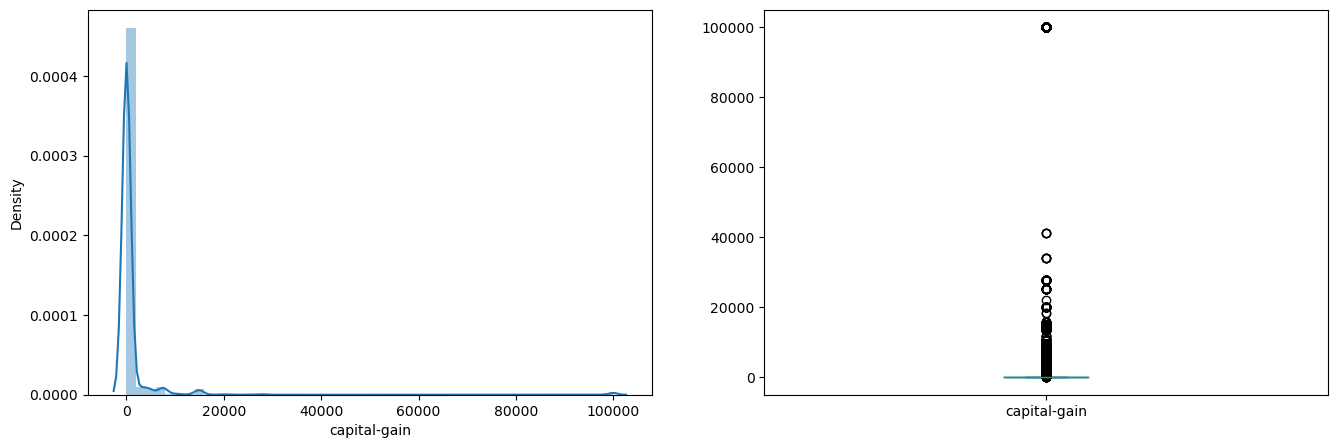

11.789002180291192


C:\Users\17460\AppData\Local\Temp\ipykernel_91724\2129048353.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-loss'])


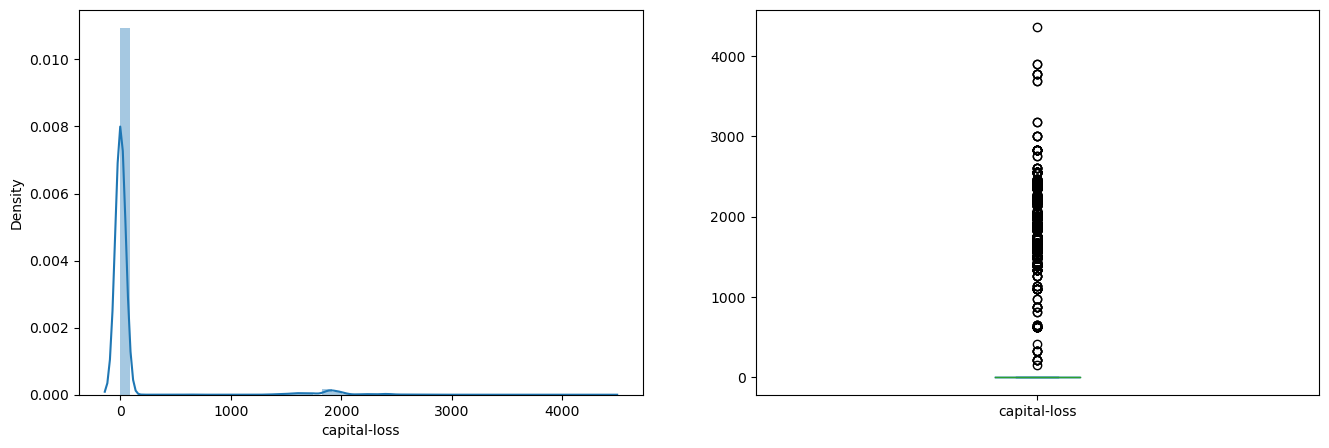

4.516304152981587


In [7]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['capital-gain'])

plt.subplot(122)
data['capital-gain'].plot.box(figsize=(16,5))
plt.show()

print(data['capital-gain'].skew())

plt.figure(2)
plt.subplot(121)
sns.distplot(data['capital-loss'])

plt.subplot(122)
data['capital-loss'].plot.box(figsize=(16,5))
plt.show()

print(data['capital-loss'].skew())

In [8]:
# Outliers Treatment
capital_gain_buffer = data['capital-gain']
capital_gain_buffer[capital_gain_buffer.values==0] = capital_gain_buffer[capital_gain_buffer.values==0] + 0.01
# print(capital_gain_buffer)

capital_loss_buffer = data['capital-loss']
capital_loss_buffer[capital_loss_buffer.values==0] = capital_loss_buffer[capital_loss_buffer.values==0] + 0.01
# print(capital_loss_buffer)

data['Log_capital-gain'] = np.log(capital_gain_buffer)
data['Log_capital-loss'] = np.log(capital_loss_buffer)
data.head()


C:\Users\17460\AppData\Local\Temp\ipykernel_91724\276511592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_gain_buffer[capital_gain_buffer.values==0] = capital_gain_buffer[capital_gain_buffer.values==0] + 0.01
C:\Users\17460\AppData\Local\Temp\ipykernel_91724\276511592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_loss_buffer[capital_loss_buffer.values==0] = capital_loss_buffer[capital_loss_buffer.values==0] + 0.01


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Log_capital-gain,Log_capital-loss
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00,0.01,40.0,United-States,<=50K,7.684324,-4.60517
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.01,0.01,13.0,United-States,<=50K,-4.605170,-4.60517
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.01,0.01,40.0,United-States,<=50K,-4.605170,-4.60517
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.01,0.01,40.0,United-States,<=50K,-4.605170,-4.60517
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.01,0.01,40.0,Cuba,<=50K,-4.605170,-4.60517


C:\Users\17460\AppData\Local\Temp\ipykernel_91724\4164330750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_capital-gain'])


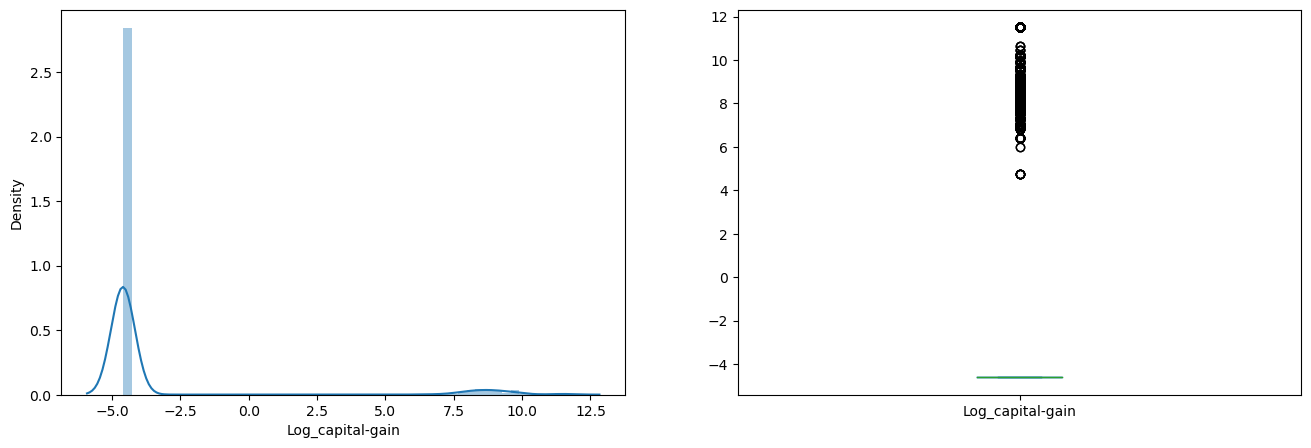

3.0378334783979124


C:\Users\17460\AppData\Local\Temp\ipykernel_91724\4164330750.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_capital-loss'])


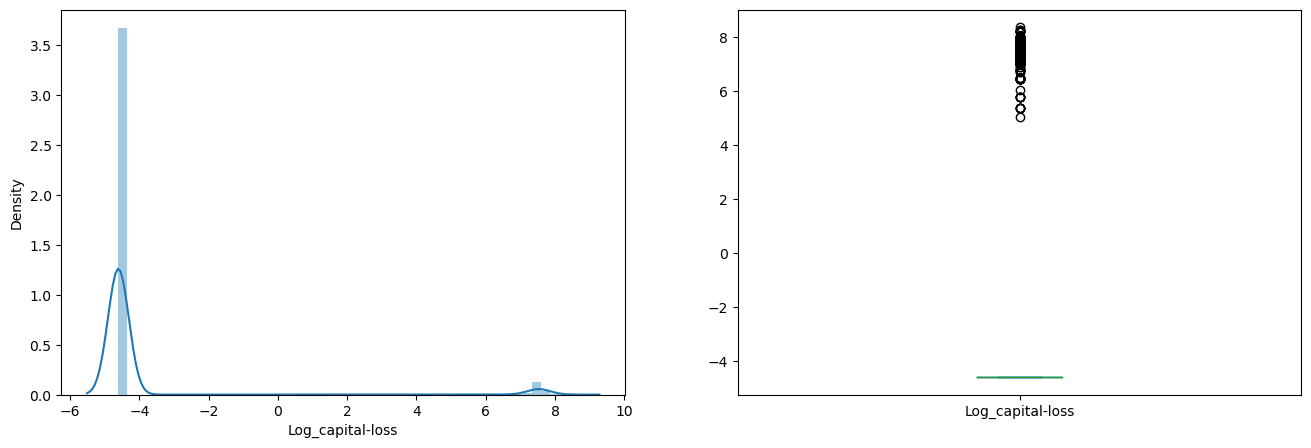

4.266936439156666


In [9]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Log_capital-gain'])

plt.subplot(122)
data['Log_capital-gain'].plot.box(figsize=(16,5))
plt.show()

print(data['Log_capital-gain'].skew())

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Log_capital-loss'])

plt.subplot(122)
data['Log_capital-loss'].plot.box(figsize=(16,5))
plt.show()

print(data['Log_capital-loss'].skew())

In [10]:
#  Data Transformation
from sklearn.preprocessing import StandardScaler

data_trans = data.copy()
numeral = ['capital-gain','capital-loss']
numeral_standard = ['Log_capital-gain', 'Log_capital-loss', 'age', 'education-num', 'hours-per-week']
data_trans.drop(columns = numeral, inplace=True)
data_trans[numeral_standard] = StandardScaler().fit_transform(data_trans[numeral_standard])

# Perform one-hot encoding on the data
## The first step is converting binary features into 0 and 1 directly by using replacing -> sex & income
data_trans['income'].replace(('<=50K', '>50K'),(0, 1),inplace=True)
data_trans['sex'].replace((' Male', ' Female'),(0, 1),inplace=True)

## Then encode other features in one-hot encoding method
data_trans = pd.get_dummies(data_trans, columns=['workclass', 'education_level', 'marital-status', 'occupation', 'relationship','race',
                                                 'native-country'],drop_first=True)


data_trans.head()


,age,education-num,sex,hours-per-week,income,Log_capital-gain,Log_capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.034201,1.128753,0,-0.078120,0,2.987394,-0.222827,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.866417,1.128753,0,-2.326738,0,-0.301526,-0.222827,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.041455,-0.438122,0,-0.078120,0,-0.301526,-0.222827,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.093385,-1.221559,0,-0.078120,0,-0.301526,-0.222827,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.798015,1.128753,1,-0.078120,0,-0.301526,-0.222827,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Exercise 3 Shuffle and Split Data

In [11]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y = data_trans['income']
X = data_trans.drop('income', axis=1)
## Splitting dataset into 80% Training and 20% Testing Data:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state=1)
## check the dimensions of the train & test subset for 
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 95)
The shape of X_test is: (9045, 95)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [12]:
# Evaluating Model 
## Here I choose GaussianNB, KNN and SVM
from sklearn import metrics

#### 1. Gaussian Naive Bayes(GaussianNB)

In [13]:
## Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 
print('GaussianNB accuracy = ', metrics.accuracy_score(y_prediction,y_test))

GaussianNB accuracy =  0.5807628524046434


GaussianNB F1 score =  0.5250501002004008


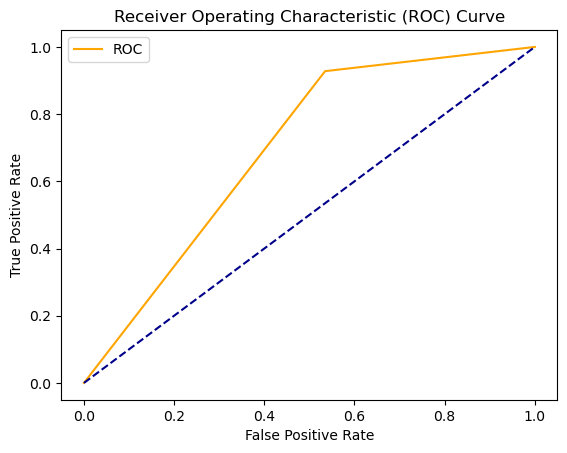

In [14]:
print('GaussianNB F1 score = ', metrics.f1_score(y_test, y_prediction))

fper, tper, thresholds = metrics.roc_curve(y_test, y_prediction) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 2. Decision Trees

In [15]:
## Decision Trees
from sklearn import tree
model = tree.DecisionTreeClassifier() 
model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 
print('Decision Trees = ', metrics.accuracy_score(y_prediction,y_test))

Decision Trees =  0.8144831398562742


#### 3. Ensemble Methods (Bagging, AdaBoost, RandomForest)

In [16]:
## Ensemble Methods (Bagging, AdaBoost, RandomForest)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### BaggingClassifier
model = BaggingClassifier() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('BaggingClassifier = ', metrics.accuracy_score(y_prediction,y_test))

### AdaBoostClassifier
model = AdaBoostClassifier() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('AdaBoostClassifier = ', metrics.accuracy_score(y_prediction,y_test))

### RandomForestClassifier
model = RandomForestClassifier() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('RandomForestClassifier = ', metrics.accuracy_score(y_prediction,y_test))

BaggingClassifier =  0.8340519624101713
AdaBoostClassifier =  0.8566058595909343
RandomForestClassifier =  0.8417910447761194


#### 4. K-Nearest Neighbors

In [17]:
## K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('KNN = ', metrics.accuracy_score(y_prediction,y_test))

KNN =  0.8297401879491432


KNN F1 score =  0.6463022508038586


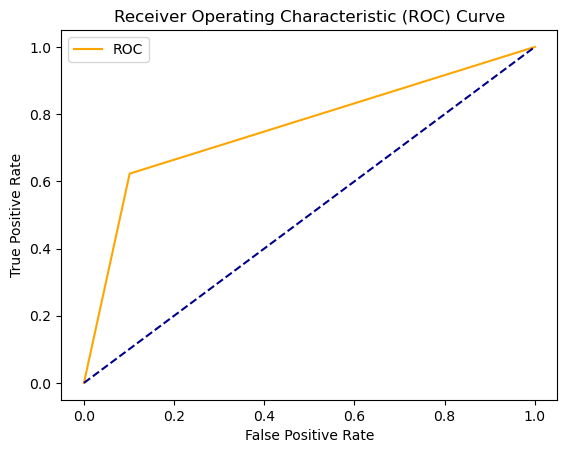

In [18]:
print('KNN F1 score = ', metrics.f1_score(y_test, y_prediction))

fper, tper, thresholds = metrics.roc_curve(y_test, y_prediction) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 5. Support Vector Machines (SVM)

In [19]:
## Support Vector Machines (SVM)
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True) 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('SVM = ', metrics.accuracy_score(y_prediction,y_test))

SVM =  0.851077943615257


SVM F1 score =  0.6619824341279799


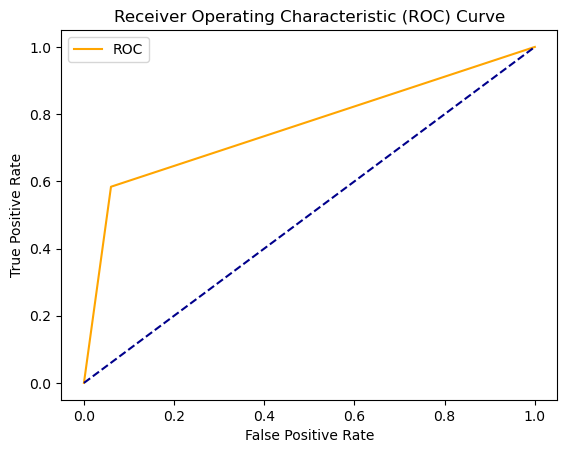

In [20]:
print('SVM F1 score = ', metrics.f1_score(y_test, y_prediction))

fper, tper, thresholds = metrics.roc_curve(y_test, y_prediction) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 6. Logistic Regression

In [21]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('LogisticRegression = ', metrics.accuracy_score(y_prediction,y_test))

LogisticRegression =  0.8403537866224433


d:\anaconda3\envs\cs405\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluation
In this lab assginment I choose GassusianNB, KNN and SVM(Kernal is rbf). 

And the F1 score results is: SVM > KNN > GaussianNB.

The ROC plot of KNN is more similar to a right angle compared to other 2 algorithms.

### Exercise 5 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [22]:
#What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
predict = np.ones(data_trans['income'].size)
print('accuracy = ', metrics.accuracy_score(predict,data_trans['income']))
print('F1 Score = ', metrics.f1_score(predict,data_trans['income']))

accuracy =  0.2478439697492371
F1 Score =  0.39723551302498666


## Question:
### Q1:

AdaBoostClassifier

In [23]:
model = AdaBoostClassifier() 
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('AdaBoostClassifier = ', metrics.accuracy_score(y_prediction,y_test))

AdaBoostClassifier =  0.8566058595909343


In [25]:
importance = pd.Series(model.feature_importances_, index = X_train.columns)
sorted_importance = importance.sort_values()
# print(sorted_importance)
plt.barh(sorted_importance.index, sorted_importance.values, height=0.7)
y = range(1,95)
plt.rcParams['figure.figsize']=(350,80)
plt.xlabel('importance')
plt.ylabel('features')
plt.title('importance_ranking')

Text(0.5, 1.0, 'importance_ranking')

### Q2:

Machine learning can be used in genetics and genomics industry, which aims to help understand vast data sets of human. The human genome is one of the largest data sets ever studied. Machine learning helps scientists identify the genetic variants shared in individuals with traits that those scientists are studying, like hemophilia or diabetes, allowing them to better understand where in the genome these disorders originate. 
***

### Q3:

#### Strength
- Machine learning allows to automate a wide variety of tasks, making them more efficient and cost-effective.
- Less reliance on human interaction.
- Machine learning is able to analyze any type of data which has more efficiency in handling data.
- Machine learning has a wider range of applications in industry.

#### When does it performs well?
- The data must be preprocessed to modify the outlier.
- The data must be normalized when the different types of data have large differences.
- The training dataset and the classes label must have a good correlation.

---

### Q4:

#### Weakness
- Machine learning requires massive data sets to train on, and these should be of good quality
- Machine learning requires large training time and hardware resource.
- Machine learning is often unexplainable and complex
- If model depends on highly dynamic variables, it may be unstable.

#### When does it performs poorly?
- The data has outlier.
- The data isn't normalized when the different types of data have large differences.
- The training dataset and the classes label do not have a good correlation.
- The dataset is poor to fullfill the requirement.

---

### Q5

- The data must have a good correlation with the classification results.
- The data must be handled to remove the outlier.
- The data must be standardlize to remove the negative effect.
- The dataset should be various and massive